执行以下探索性时间序列分析，使用巧克力或啤酒生产数据。  
a) 绘制数据的时间序列图。绘制聚合的年度系列和一个综合了每个季节观察值的箱线图，并评论这些图。  
b) 将系列分解为趋势、季节效应和残差，并绘制分解后的系列。绘制包含超级季节效应的趋势图。

In [199]:
import pandas as pd
import numpy as np

df = pd.read_csv("季节周期数据.csv")

In [200]:
df

,日期,choc,beer,elec
0,1958/1/1,1451,96.30,1497
1,1958/2/1,2037,84.40,1463
2,1958/3/1,2477,91.20,1648
3,1958/4/1,2785,81.90,1595
4,1958/5/1,2994,80.50,1777
...,...,...,...,...
391,1990/8/1,8715,148.30,14338
392,1990/9/1,8450,133.50,12867
393,1990/10/1,9085,193.80,12761
394,1990/11/1,8350,208.40,12449


In [201]:
import datetime as dt

tt = []
for i in df["日期"]:
    a = dt.datetime.strptime(i,'%Y/%m/%d')
    b = dt.datetime.strftime(a,'%Y-%m-%d')
    tt.append(b)
df['date'] = tt

In [202]:
df['date'] = pd.to_datetime(df['date'])  # 将日期列转换为Datetime类型
df.set_index('date', inplace=True)

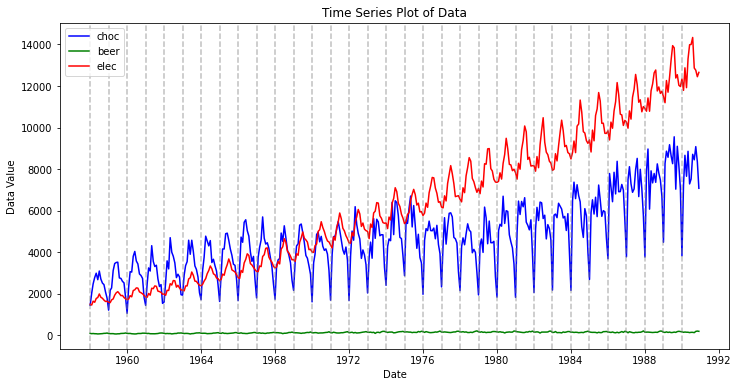

In [203]:
# 1. 画出数据的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['choc'], linestyle='-', label='choc', color='b')
plt.plot(df.index, df['beer'], linestyle='-', label='beer', color='g')
plt.plot(df.index, df['elec'], linestyle='-', label='elec', color='r')
plt.title('Time Series Plot of Data')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.legend()

# 添加横轴标签（仅显示每年的第一天）
for year in df.index.year.unique():
    first_day_of_year = df[df.index.year == year].index[0]
    plt.axvline(x=first_day_of_year, color='gray', linestyle='--', alpha=0.5, label=f'Year {year}')

plt.grid(False)  # 禁用网格线

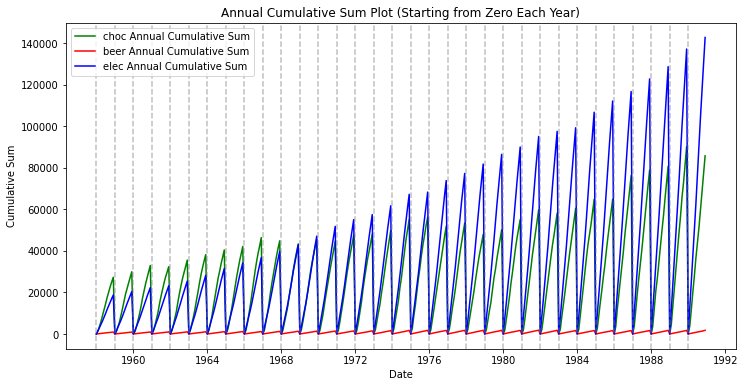

In [205]:
# 2. 计算并画出每年从头开始的年度累计折线图
df['year'] = df.index.year
df['annual_cumsum1'] = df.groupby('year')['choc'].cumsum() - df['choc']
df['annual_cumsum2'] = df.groupby('year')['beer'].cumsum() - df['beer']
df['annual_cumsum3'] = df.groupby('year')['elec'].cumsum() - df["elec"]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['annual_cumsum1'], linestyle='-', label='choc Annual Cumulative Sum', color='g')
plt.plot(df.index, df['annual_cumsum2'], linestyle='-', label='beer Annual Cumulative Sum', color='r')
plt.plot(df.index, df['annual_cumsum3'], linestyle='-', label='elec Annual Cumulative Sum', color='b')
plt.title('Annual Cumulative Sum Plot (Starting from Zero Each Year)')
plt.xlabel('Date')
plt.ylabel('Cumulative Sum')
plt.legend()

# 添加横轴标签（仅显示每年的第一天）
for year in df.index.year.unique():
    first_day_of_year = df[df.index.year == year].index[0]
    plt.axvline(x=first_day_of_year, color='gray', linestyle='--', alpha=0.5, label=f'Year {year}')

plt.grid(False)  # 禁用网格线

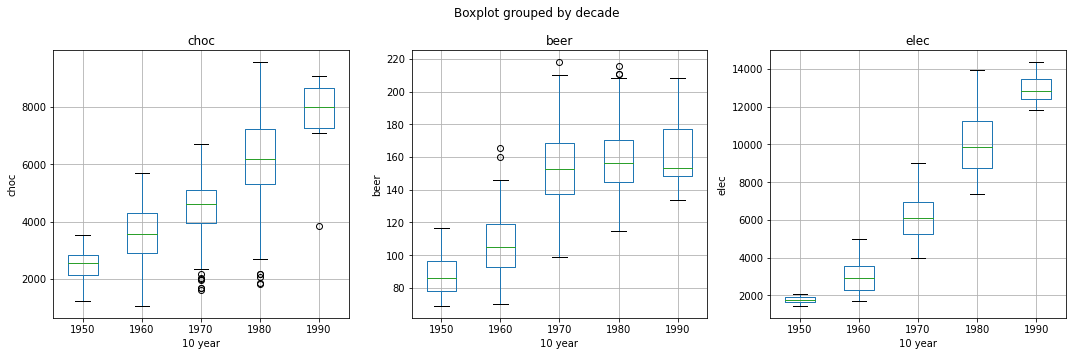

In [207]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算年份的十年区间
df['decade'] = (df['year'] // 10) * 10

# 分组并绘制箱线图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(['choc', 'beer', 'elec']):
    df.boxplot(column=feature, by='decade', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('10 year')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


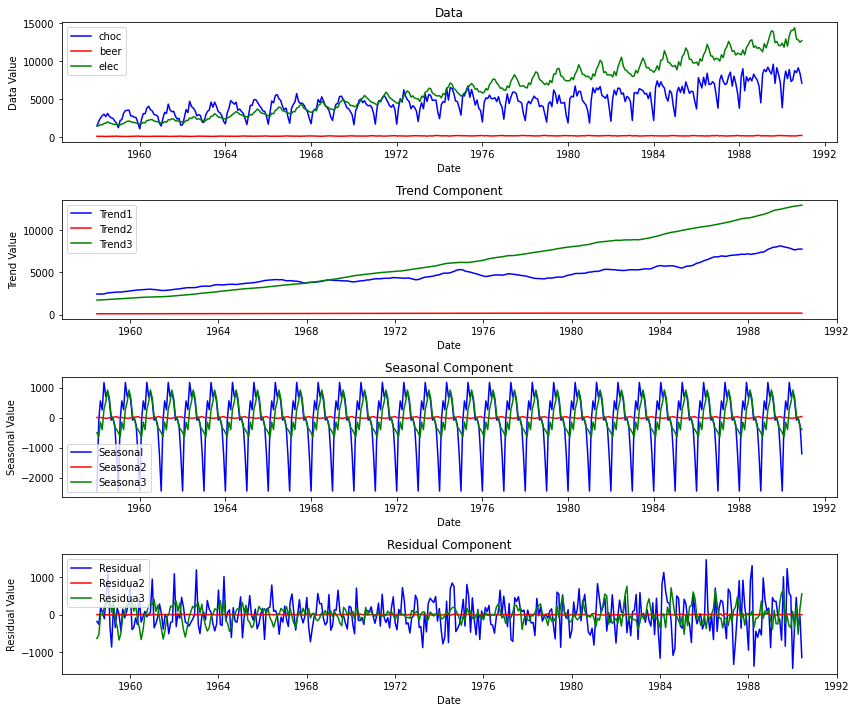

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 进行季节分解
result1 = seasonal_decompose(df['choc'], model='additive')
result2 = seasonal_decompose(df['beer'], model='additive')
result3 = seasonal_decompose(df['elec'], model='additive')

# 绘制分解后的系列
plt.figure(figsize=(12, 10))

# 原始数据
plt.subplot(4, 1, 1)
plt.plot(df.index, df['choc'], label='choc', color='b')
plt.plot(df.index, df['beer'], label='beer', color='r')
plt.plot(df.index, df['elec'], label='elec', color='g')
plt.title('Data')
plt.xlabel('Date')
plt.ylabel('Data Value')
plt.grid(False)
plt.legend()

# 趋势分量
plt.subplot(4, 1, 2)
plt.plot(df.index, result1.trend, label='Trend1', color='b')
plt.plot(df.index, result2.trend, label='Trend2', color='r')
plt.plot(df.index, result3.trend, label='Trend3', color='g')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.grid(False)
plt.legend()

# 季节效应
plt.subplot(4, 1, 3)
plt.plot(df.index, result1.seasonal, label='Seasonal', color='b')
plt.plot(df.index, result2.seasonal, label='Seasona2', color='r')
plt.plot(df.index, result3.seasonal, label='Seasona3', color='g')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal Value')
plt.grid(False)
plt.legend()

# 残差
plt.subplot(4, 1, 4)
plt.plot(df.index, result1.resid, label='Residual', color='b')
plt.plot(df.index, result2.resid, label='Residua2', color='r')
plt.plot(df.index, result3.resid, label='Residua3', color='g')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()